**FEATURE EXTRACTION**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import urllib
from urllib.parse import urlparse
import re
from math import log
import time
start_time = time.time()

df = pd.read_csv('/content/drive/MyDrive/ML-Phishing Detection Project/data/final_urls.csv')
urls = [url for url in df['url']]
print( "[%s datas]" %(len(urls)))

df['protocol'],df['domain'],df['path'],df['query'],df['fragment'] = zip(*[urllib.parse.urlsplit(x) for x in urls])

shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"

def getEntropy(url):
    url = url.lower()
    probs = [url.count(c) / len(url) for c in set(url)]
    entropy = -sum([p * log(p) / log(2.0) for p in probs])
    return entropy

def hasLogin(url):
    return int('login' in url.lower())

def redirection(url):
    pos = url.rfind('//')
    if pos > 6:
      if pos > 7:
        return 1
      else:
        return 0
    else:
      return 0

def lenClassify(url):
    if len(url) < 54:
      length = 0
    else:
      length = 1
    return length

def haveAtSign(url):
    if "@" in url:
      at = 1
    else:
      at = 0
    return at

def getDepth(url):
    s = urlparse(url).path.split('/')
    depth = 0
    for j in range(len(s)):
      if len(s[j]) != 0:
        depth = depth+1
    return depth

def tinyURL(url):
    match=re.search(shortening_services,url)
    if match:
        return 1
    else:
        return 0

def isDomainIp(domain):
    domain = domain.split(':')
    pattern = r'^(?:[0-9]{1,3}\.){3}[0-9]{1,3}$|^(?:[a-f0-9]{1,4}:){7}[a-f0-9]{1,4}$'
    match = re.match(pattern, domain[0])
    if match is not None:
      return 1
    else:
      return 0

def prefixSuffix(domain):
    if '-' in domain:
        return 1
    else:
        return 0

def get_features(df):
    df['get_Entropy'] = df['url'].map(lambda x: getEntropy(x))
    df['has_Login'] = df['url'].map(lambda x: hasLogin(x))
    df['redirection'] = df['url'].map(lambda x: redirection(x))
    df['len_Classify'] = df['url'].map(lambda x: lenClassify(x))
    df['have_At_Sign'] = df['url'].map(lambda x: haveAtSign(x))
    df['get_Depth'] = df['url'].map(lambda x: getDepth(x))
    df['tiny_URL'] = df['url'].map(lambda x: tinyURL(x))
    df['is_Domain_Ip'] = df['domain'].map(lambda x: isDomainIp(x))
    df['prefix_Suffix'] = df['domain'].map(lambda x: prefixSuffix(x))

    needed_cols = ['url', 'domain', 'path', 'query', 'fragment']
    for col in needed_cols:
        df[f'{col}_length']=df[col].str.len()
        df[f'qty_dot_{col}'] = df[[col]].applymap(lambda x: str.count(x, '.'))
        df[f'qty_hyphen_{col}'] = df[[col]].applymap(lambda x: str.count(x, '-'))
        df[f'qty_slash_{col}'] = df[[col]].applymap(lambda x: str.count(x, '/'))
        df[f'qty_questionmark_{col}'] = df[[col]].applymap(lambda x: str.count(x, '?'))
        df[f'qty_equal_{col}'] = df[[col]].applymap(lambda x: str.count(x, '='))
        df[f'qty_at_{col}'] = df[[col]].applymap(lambda x: str.count(x, '@'))
        df[f'qty_and_{col}'] = df[[col]].applymap(lambda x: str.count(x, '&'))
        df[f'qty_exclamation_{col}'] = df[[col]].applymap(lambda x: str.count(x, '!'))
        df[f'qty_space_{col}'] = df[[col]].applymap(lambda x: str.count(x, ' '))
        df[f'qty_tilde_{col}'] = df[[col]].applymap(lambda x: str.count(x, '~'))
        df[f'qty_comma_{col}'] = df[[col]].applymap(lambda x: str.count(x, ','))
        df[f'qty_plus_{col}'] = df[[col]].applymap(lambda x: str.count(x, '+'))
        df[f'qty_asterisk_{col}'] = df[[col]].applymap(lambda x: str.count(x, '*'))
        df[f'qty_hashtag_{col}'] = df[[col]].applymap(lambda x: str.count(x, '#'))
        df[f'qty_dollar_{col}'] = df[[col]].applymap(lambda x: str.count(x, '$'))
        df[f'qty_percent_{col}'] = df[[col]].applymap(lambda x: str.count(x, '%'))

get_features(df)

col_in_question = ['qty_slash_domain', 'qty_questionmark_domain','qty_equal_domain', 'qty_at_domain', 'qty_and_domain',
 'qty_exclamation_domain', 'qty_space_domain', 'qty_tilde_domain','qty_comma_domain', 'qty_plus_domain',
 'qty_asterisk_domain','qty_hashtag_domain', 'qty_dollar_domain', 'qty_percent_domain', 'qty_questionmark_path',
 'qty_hashtag_path', 'qty_hashtag_query', 'qty_at_fragment','qty_tilde_fragment', 'qty_plus_fragment']

df.drop(columns = col_in_question, inplace=True)

df.to_csv("/content/drive/MyDrive/ML-Phishing Detection Project/data/url_features.csv",index=False)

noOfFeatures=len(df.select_dtypes(include='int').columns)

print("\n--- %s features extracted in %s seconds ---" % (noOfFeatures,time.time() - start_time))



[545895 datas]

--- 74 features extracted in 52.08950185775757 seconds ---


**HEAT MAP**

**BOXPLOT GRAPH**

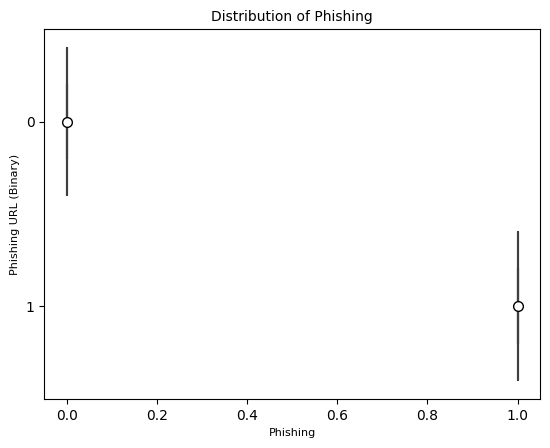

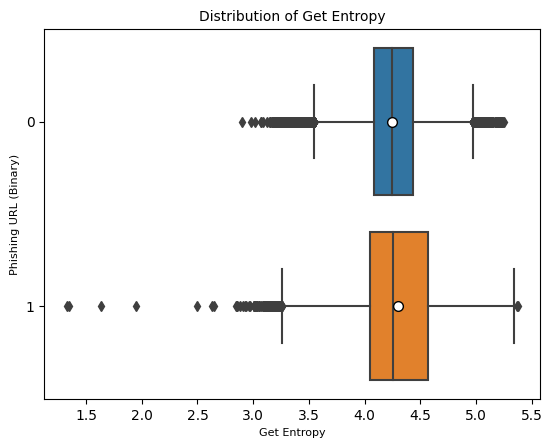

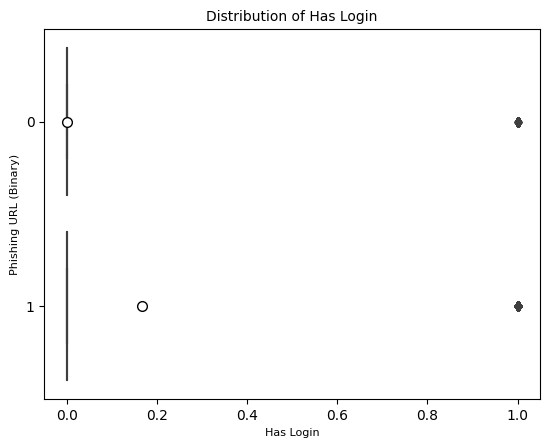

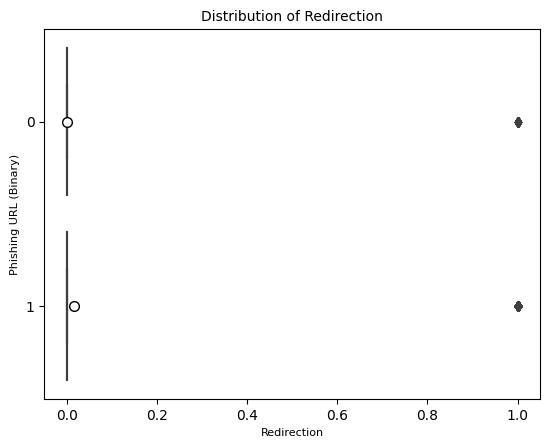

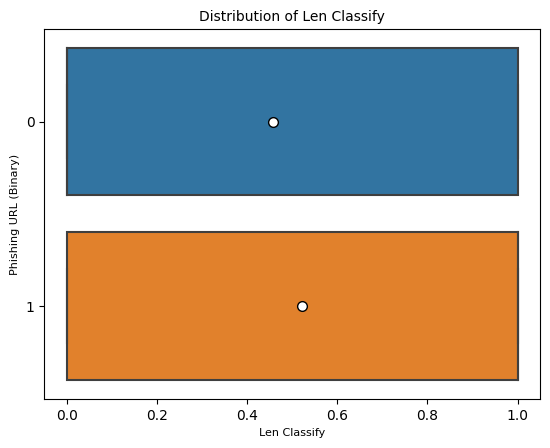

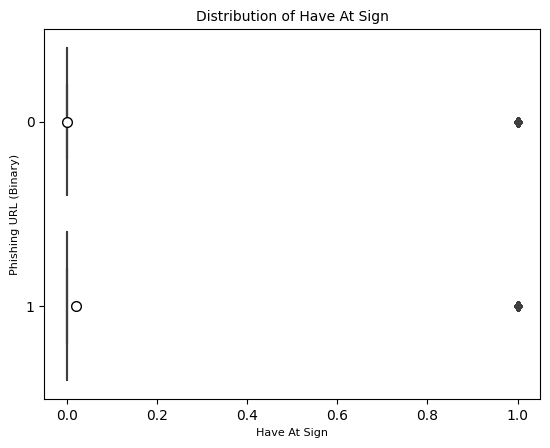

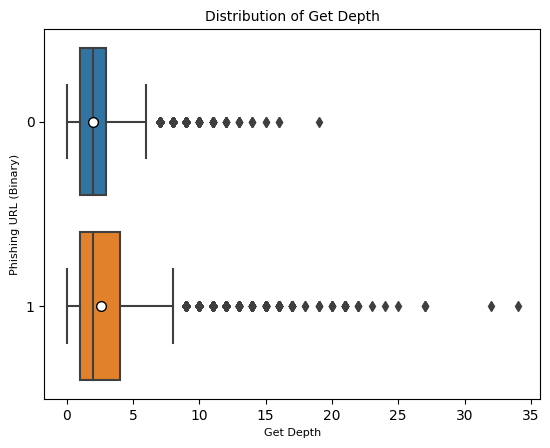

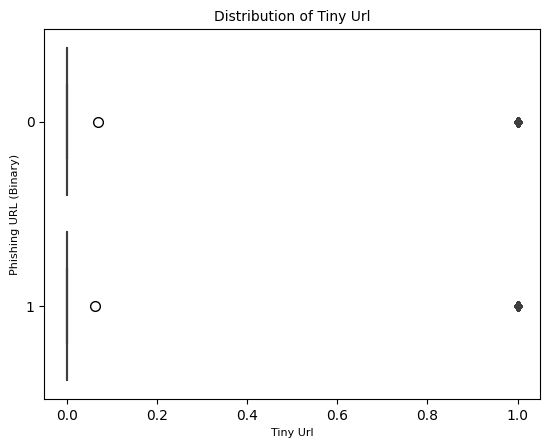

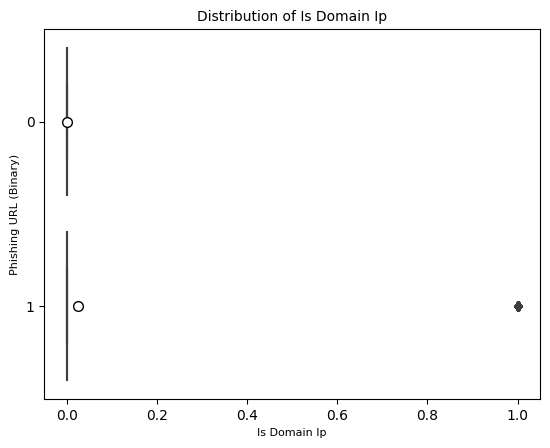

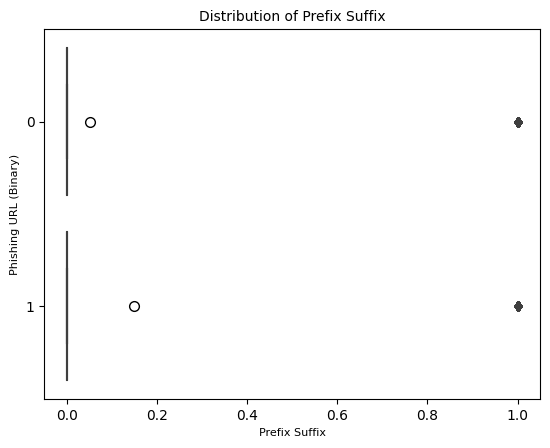

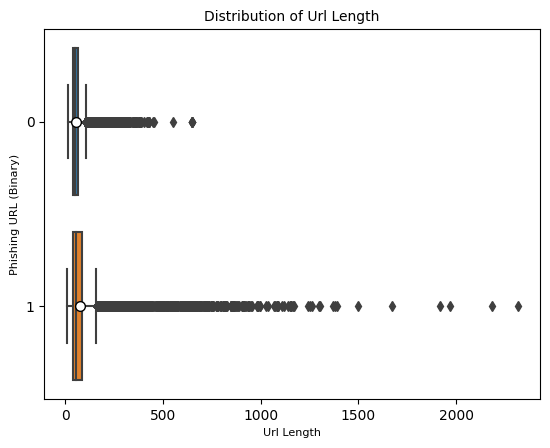

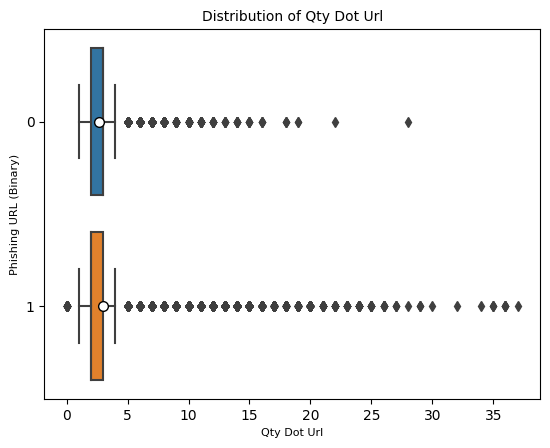

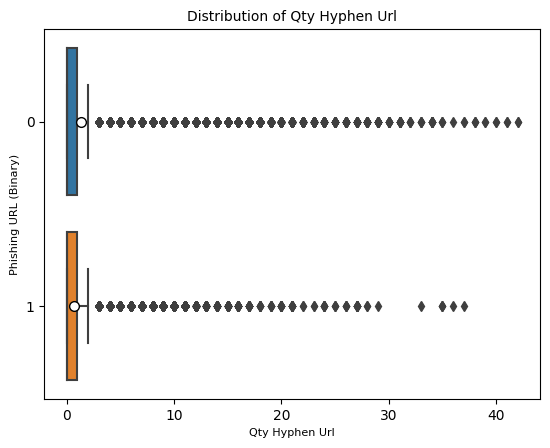

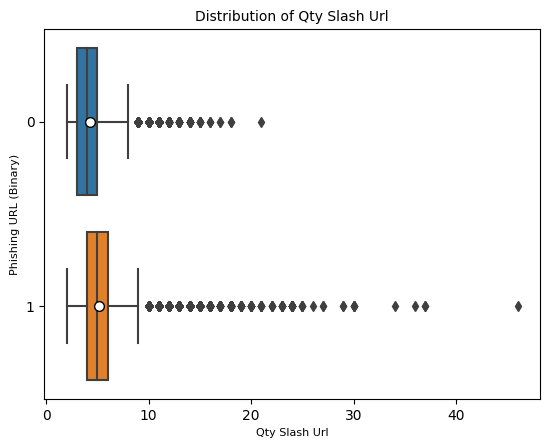

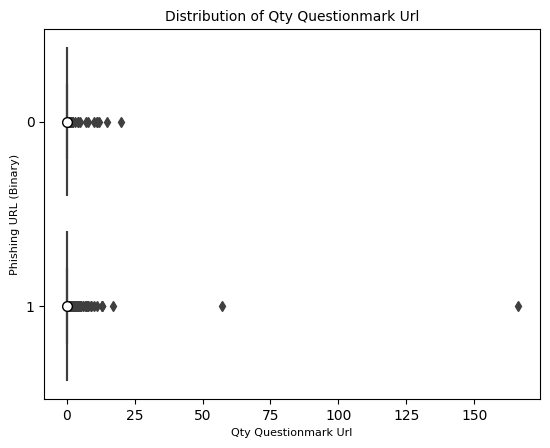

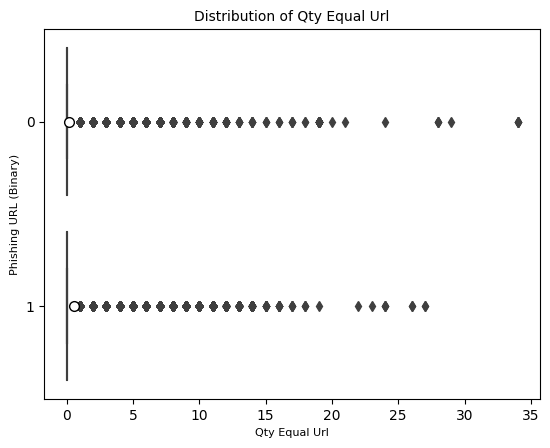

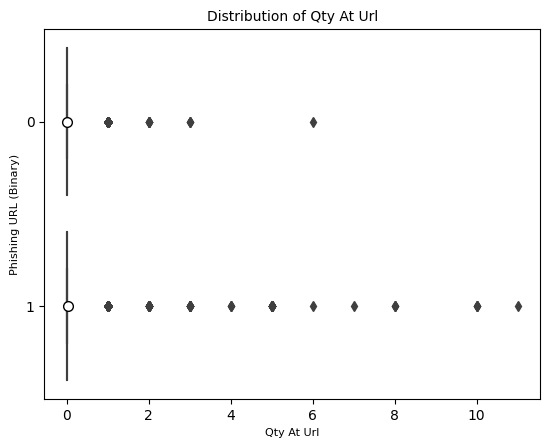

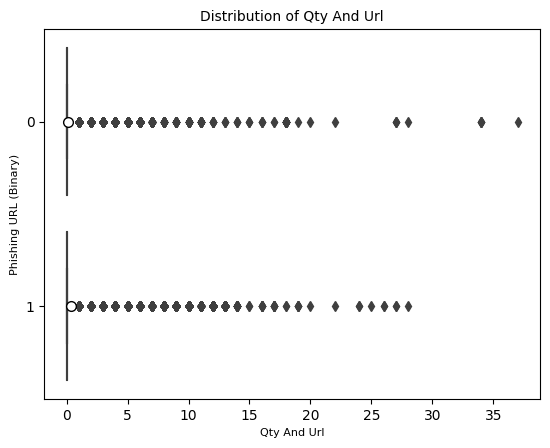

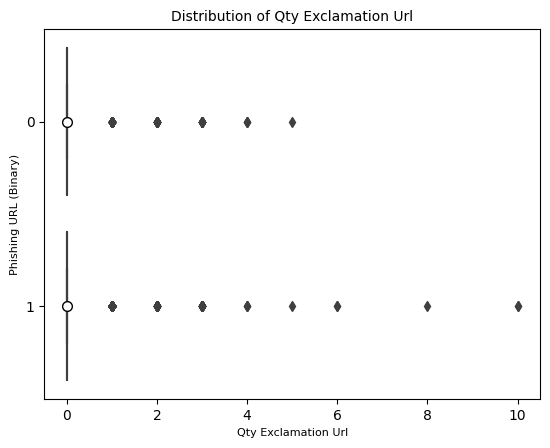

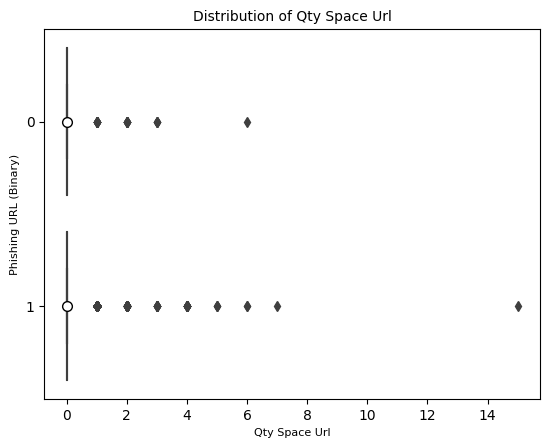

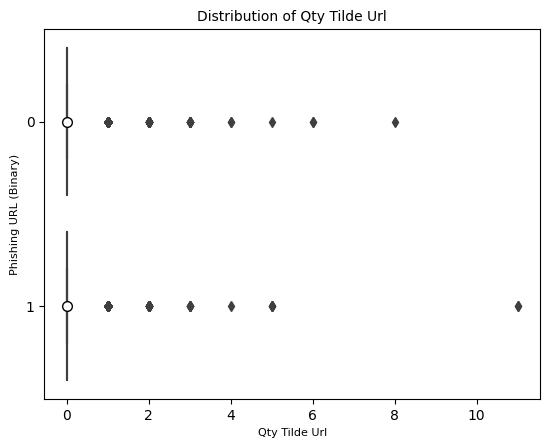

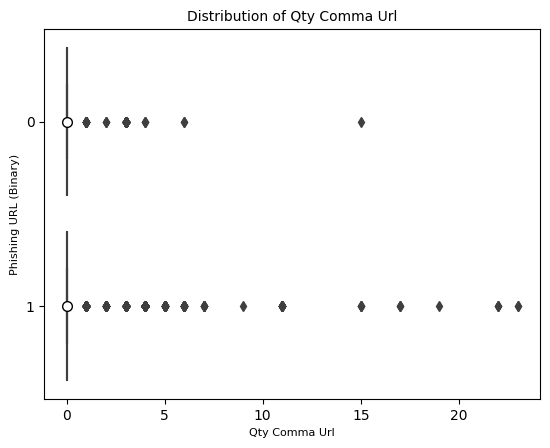

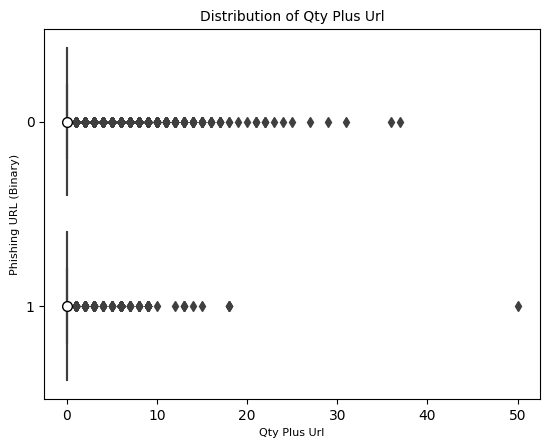

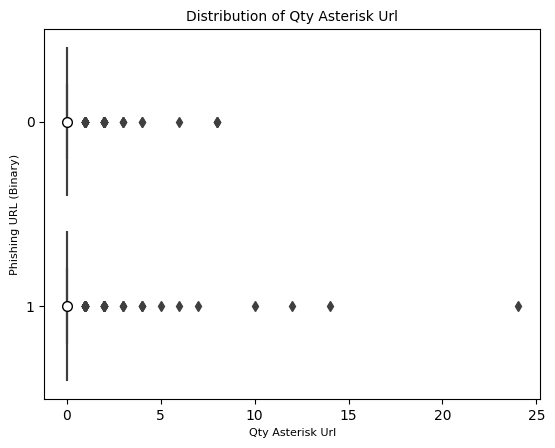

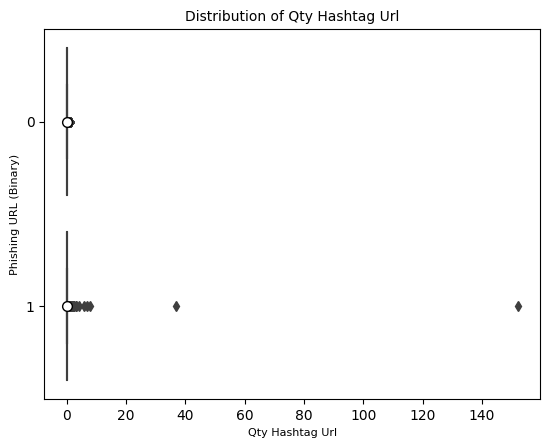

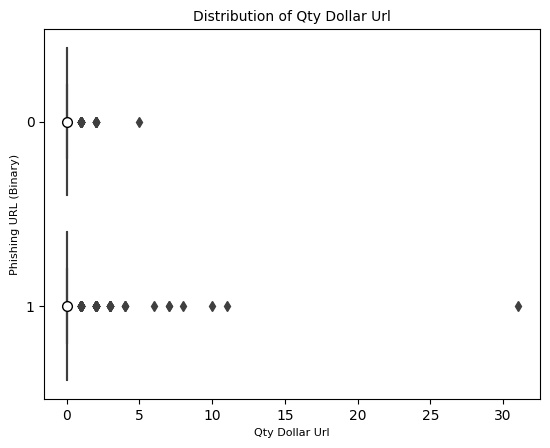

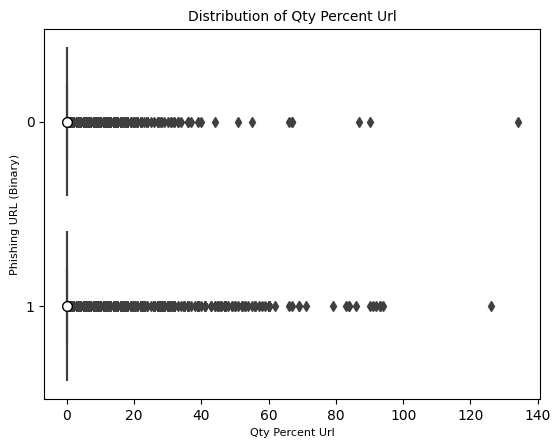

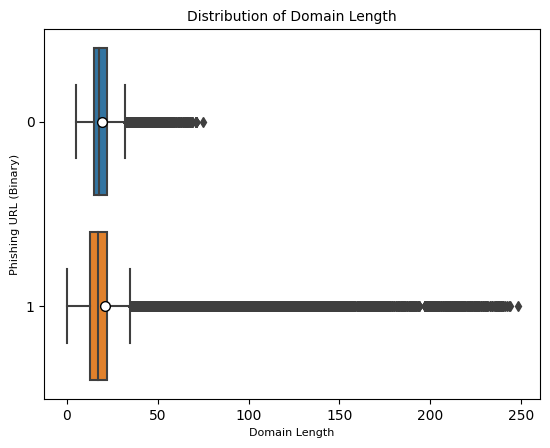

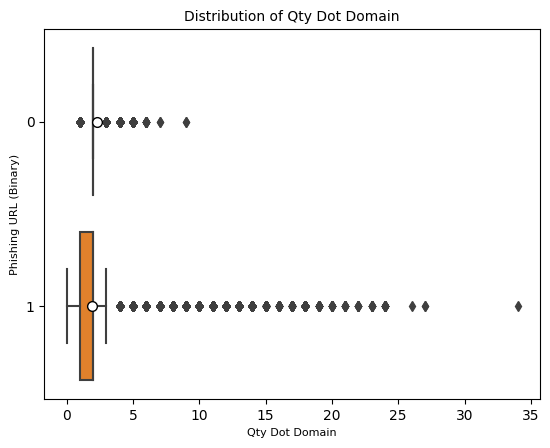

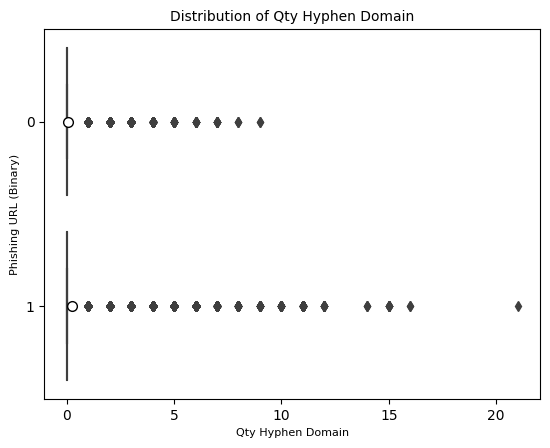

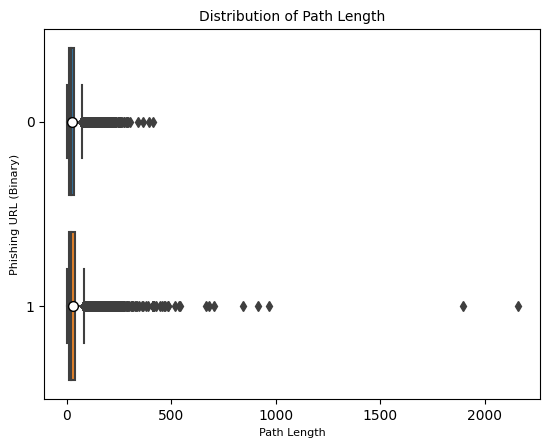

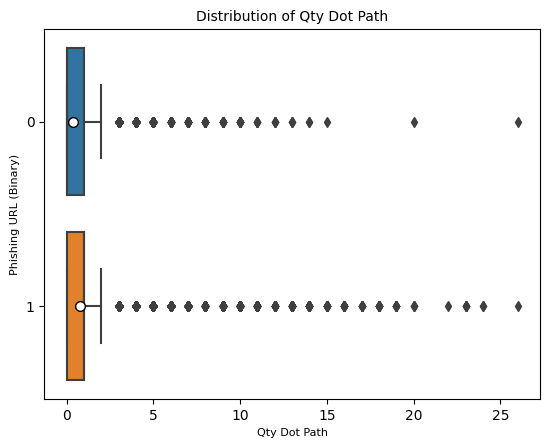

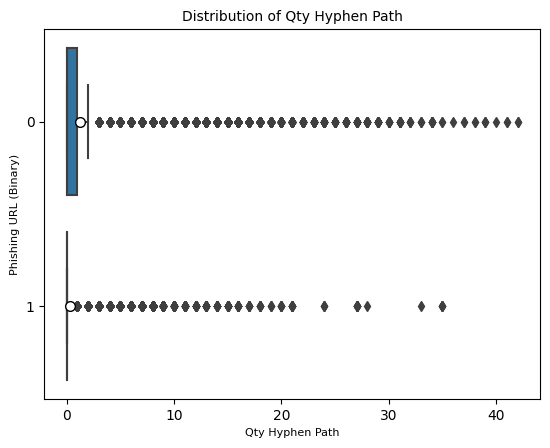

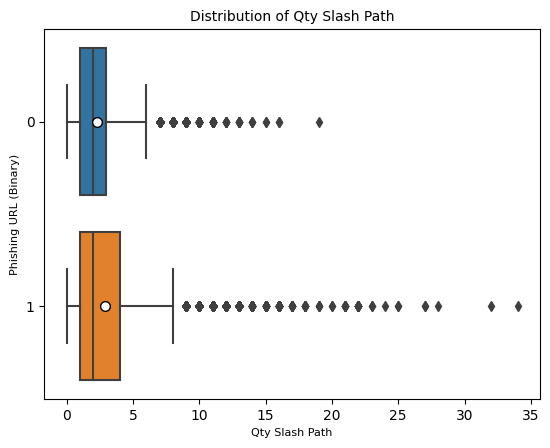

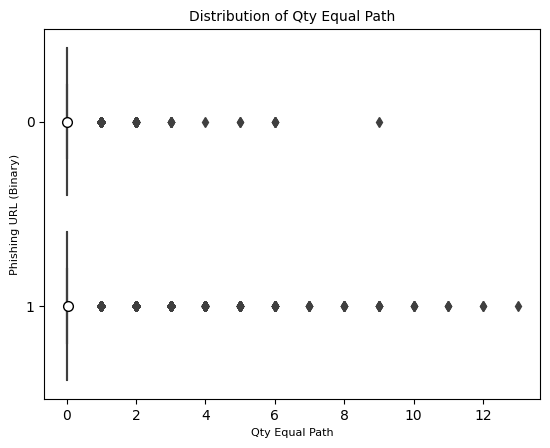

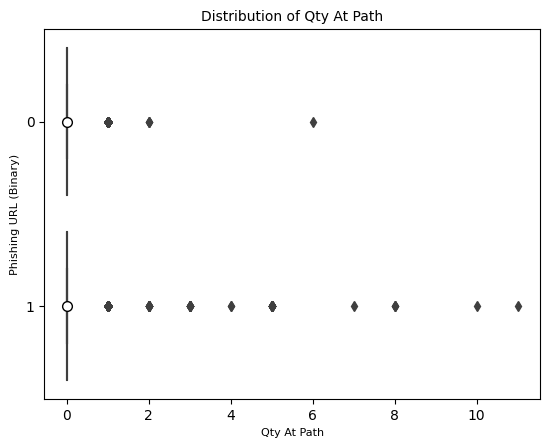

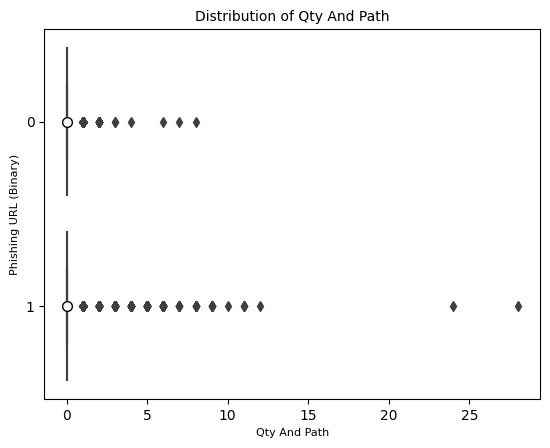

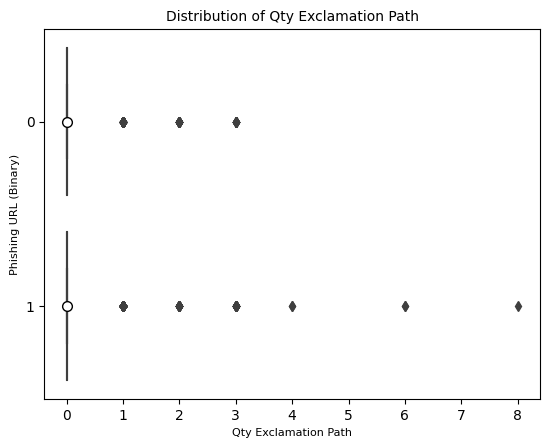

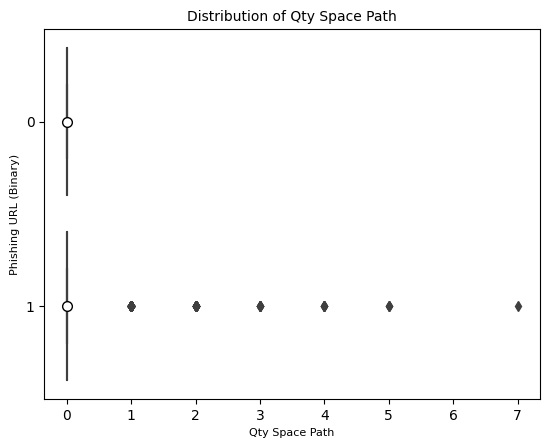

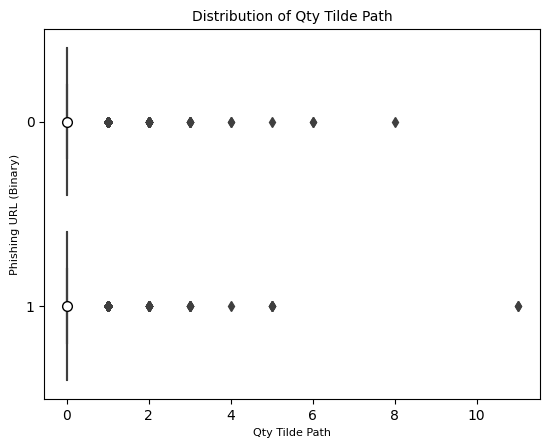

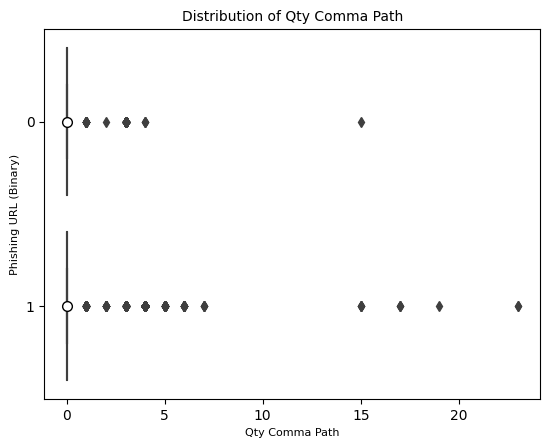

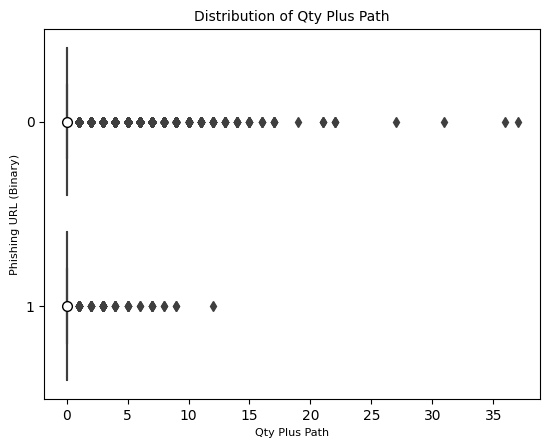

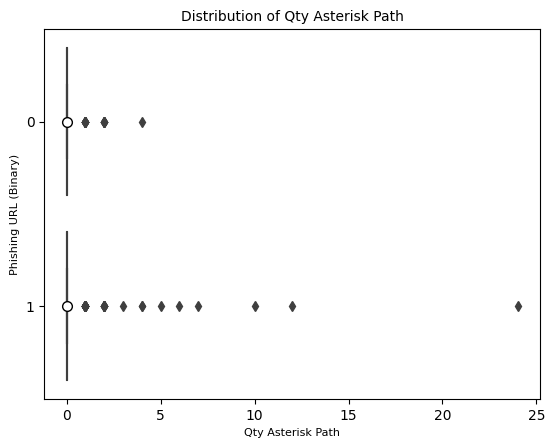

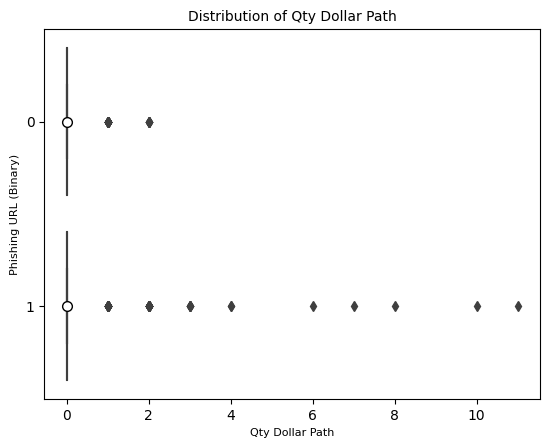

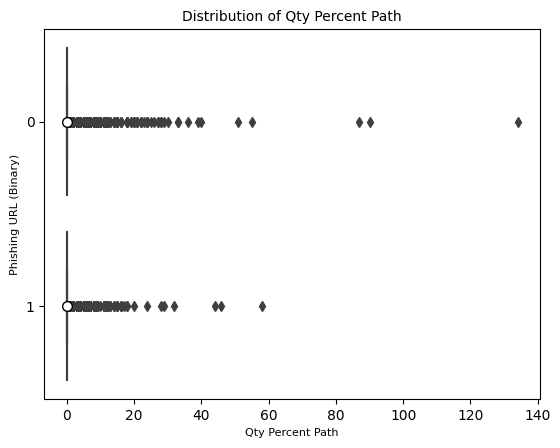

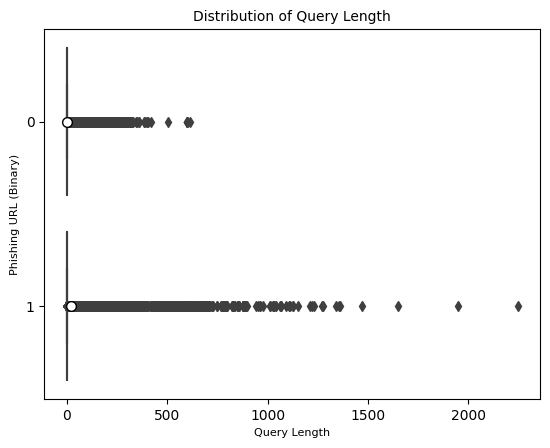

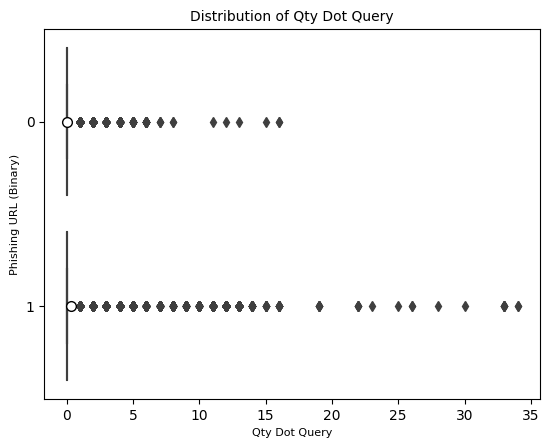

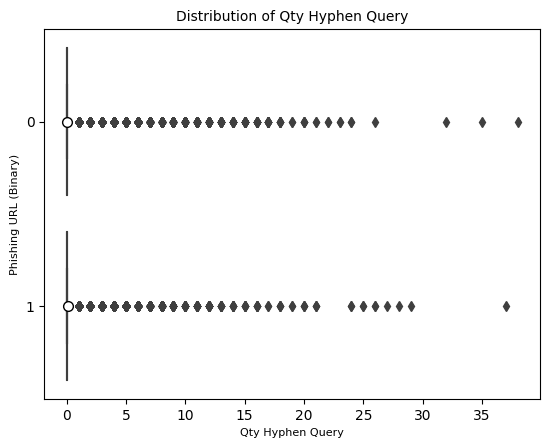

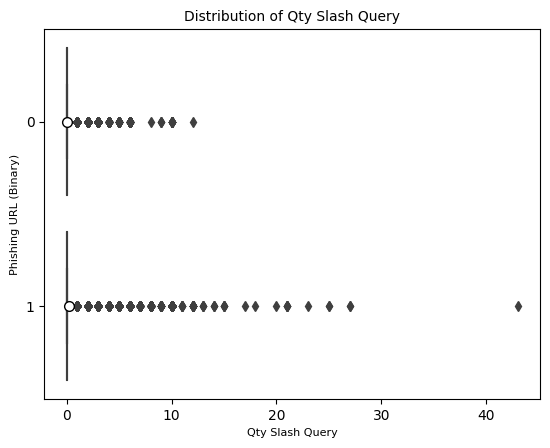

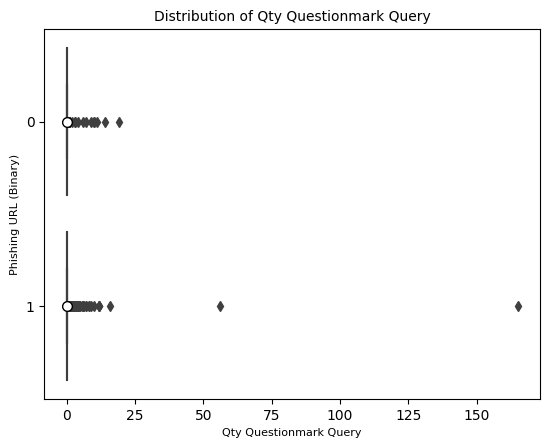

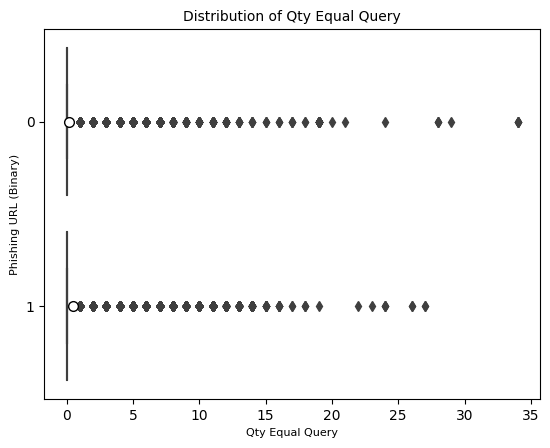

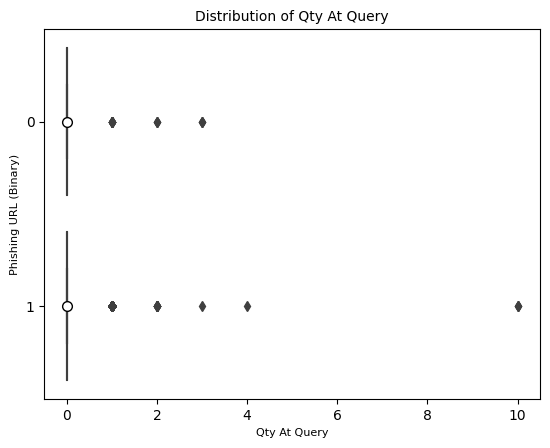

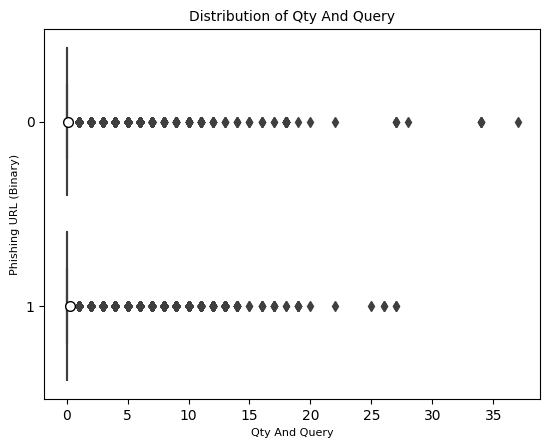

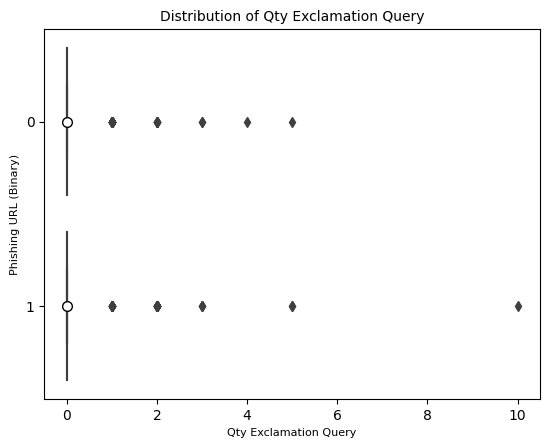

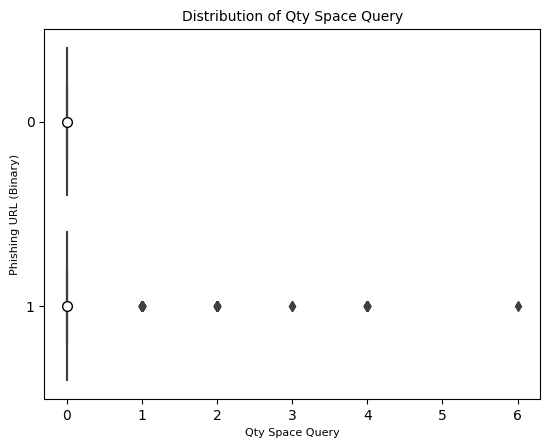

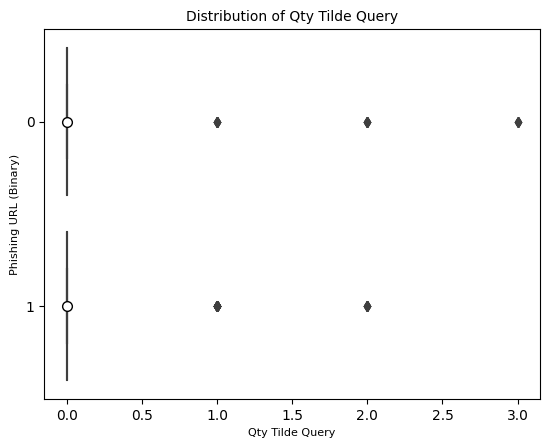

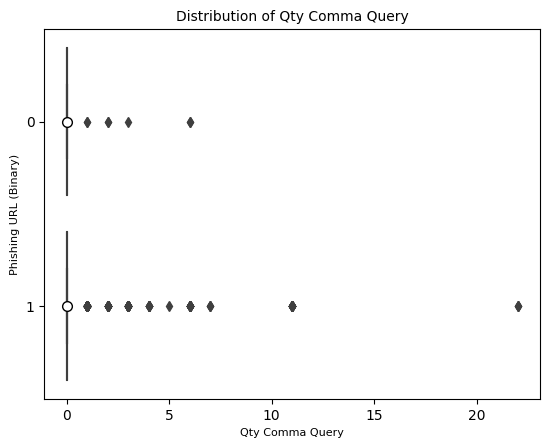

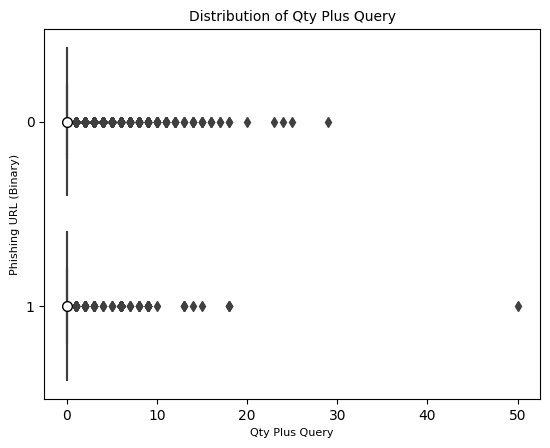

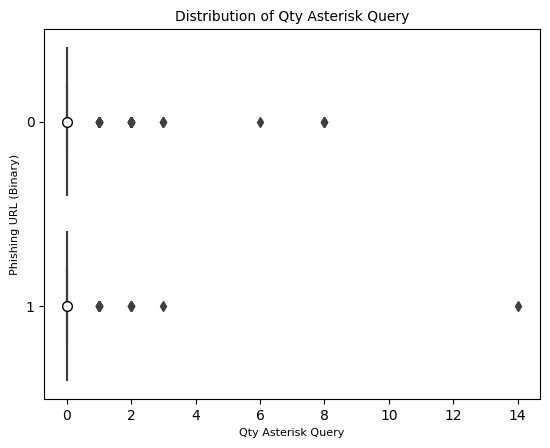

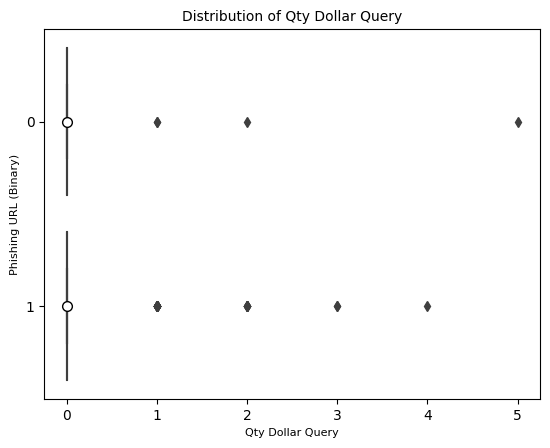

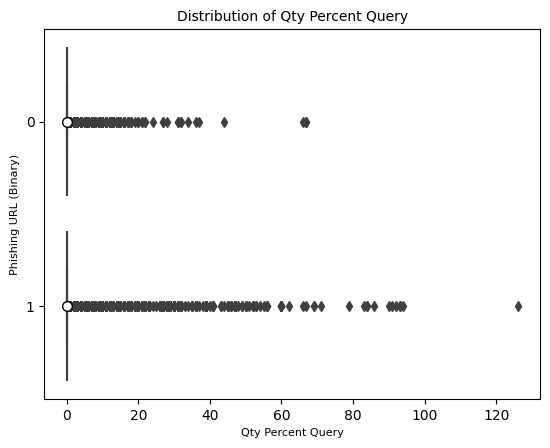

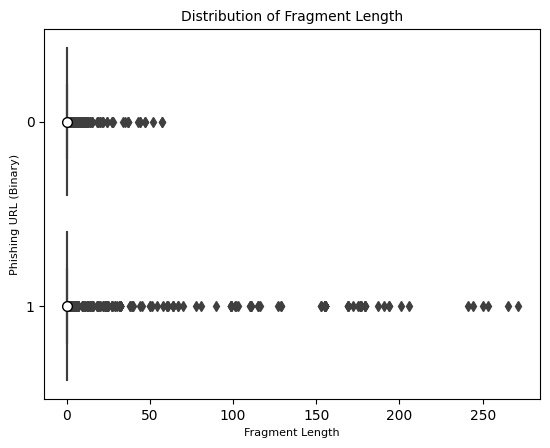

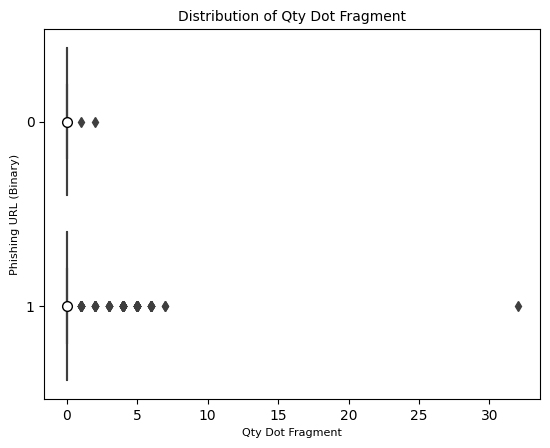

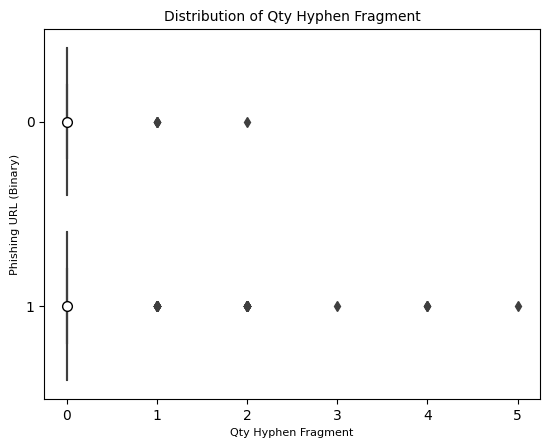

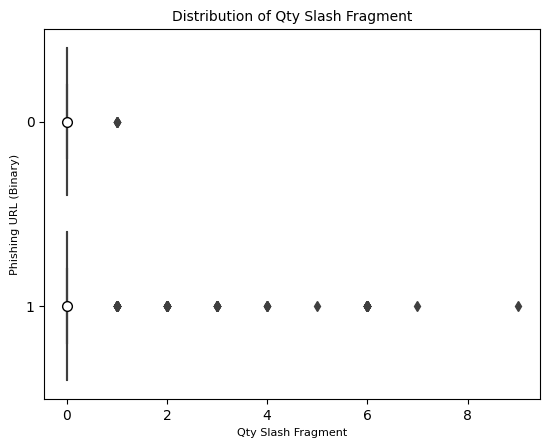

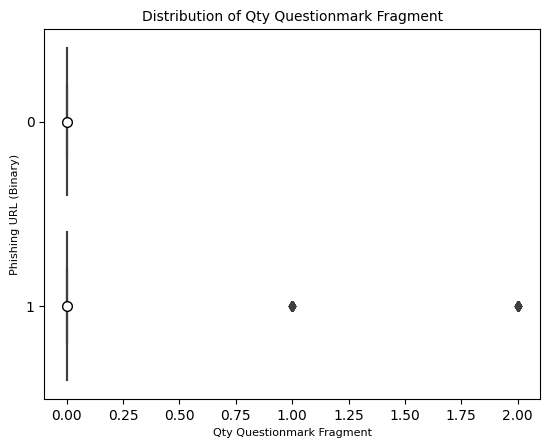

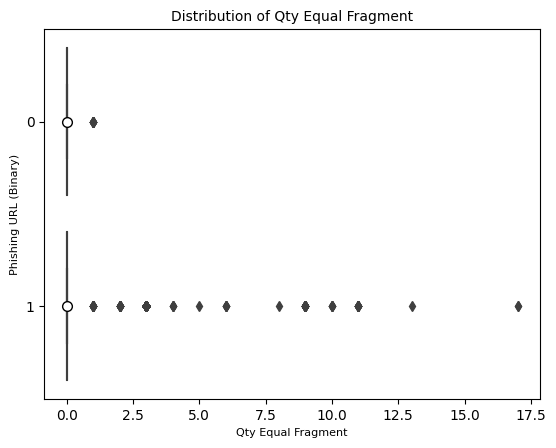

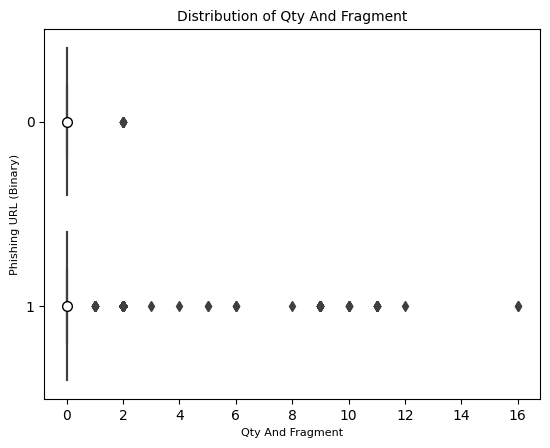

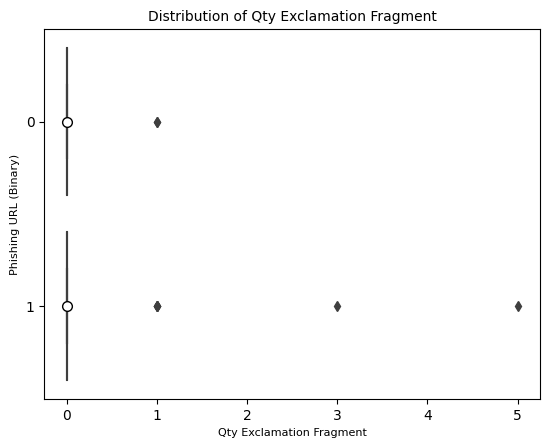

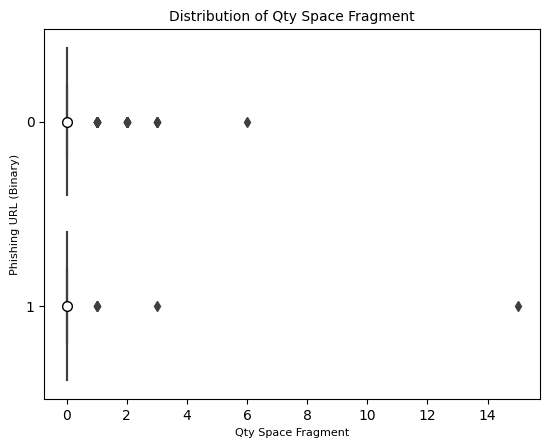

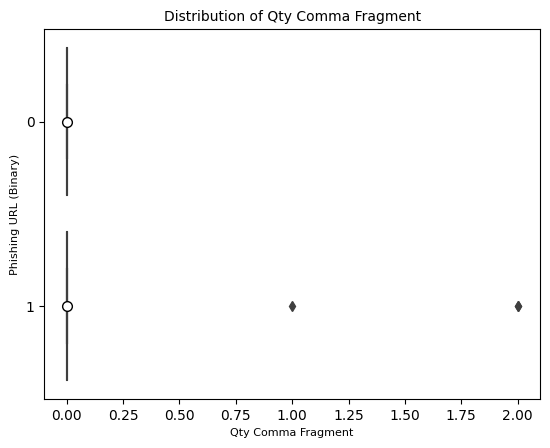

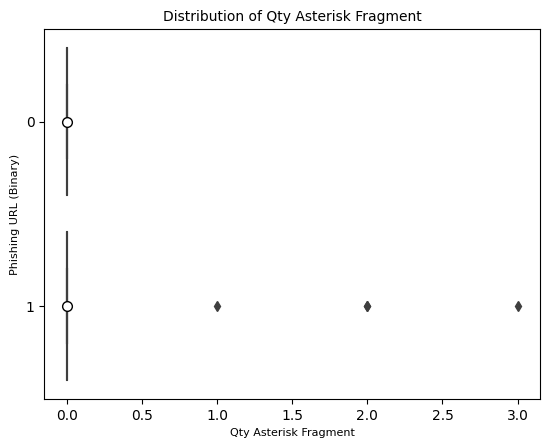

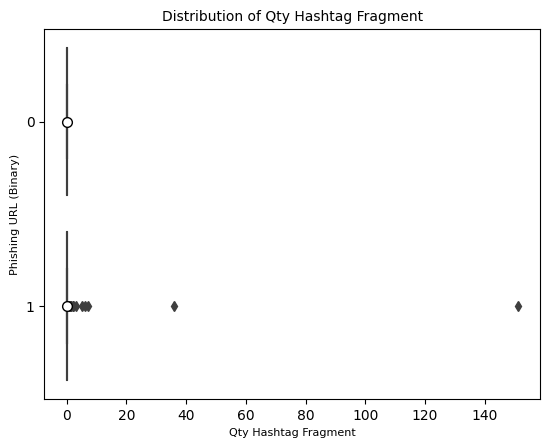

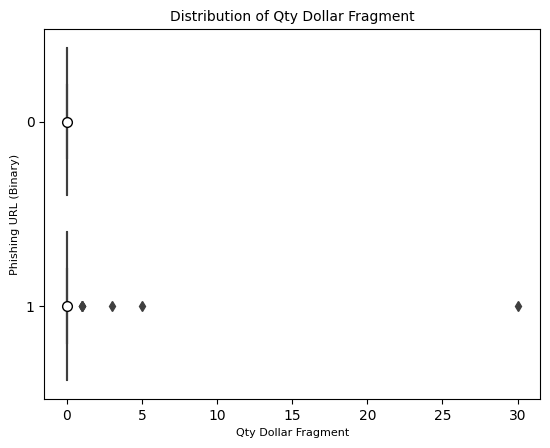

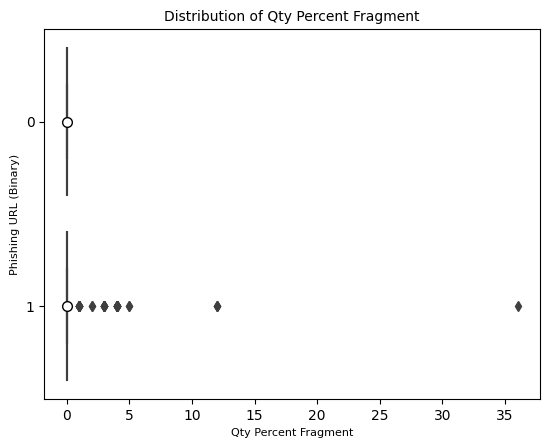

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
num_cols = df.select_dtypes(exclude='object')

for col in num_cols:
    column_name = col.title().replace('_', ' ')
    title = 'Distribution of ' + column_name
    sns.boxplot(x=df[col],
                y=df['phishing'],
                data=df,
                orient='h',
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white",
                           "markeredgecolor":"black",
                           "markersize":"7"})
    plt.xlabel(column_name, fontsize = 8)
    plt.ylabel('Phishing URL (Binary)', fontsize = 8)
    plt.title(title, fontsize = 10, pad = 6)
    plt.show();